In [6]:
# ignore this block if you are running locally
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [11]:
# imported required packages. Add the one you need.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from PIL import Image

import os
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms


ModuleNotFoundError: No module named 'numpy'

# Video/Images Classification

In [1]:
# TODO 1
# Create training and testing dataset from the image files
# Transform your images before creating data loaders

# Define transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to a standard size
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Standard normalization for RGB images
])

# Create custom Dataset class
class GestureDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.images = []
        self.labels = []
        
        # Assuming your directory structure is data_dir/class_name/image_files
        for class_idx, class_name in enumerate(os.listdir(data_dir)):
            class_path = os.path.join(data_dir, class_name)
            if os.path.isdir(class_path):
                for img_name in os.listdir(class_path):
                    if img_name.endswith(('.jpg', '.jpeg', '.png')):
                        self.images.append(os.path.join(class_path, img_name))
                        self.labels.append(class_idx)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
            
        return image, label

# Create training and testing datasets
# Assuming your data is in 'train' and 'test' subdirectories
train_dataset = GestureDataset(data_dir='path/to/train/data', transform=transform)
test_dataset = GestureDataset(data_dir='path/to/test/data', transform=transform)

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



NameError: name 'transforms' is not defined

In [ ]:
# import packages for building sequential model
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [ ]:
class GestureRecognitionModel(nn.Module):
    def __init__(self, num_classes):
        super(GestureRecognitionModel, self).__init__()

        # TODO 2: construct your own model. CNNs+LSTM is recommended


    def forward(self, x):
        batch_size, seq_len, c, h, w = x.size()  # Shape: (batch_size, seq_len, c, h, w)

        # TODO 3: write your feed forward network







In [ ]:
# Set device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the model, loss function, and optimizer
model = GestureRecognitionModel(num_classes=5).to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()  # For multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # change the learning rate as you want

In [ ]:
# TODO 4: train your model with sequnce of images, you should aim for at least
# 45% training accuracy. Report your training accuracy.


num_epochs =  # set the number of epochs for training

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Loop over each batch
    for i, (sequences, labels) in enumerate(train_loader):
        sequences, labels = sequences.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(sequences)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()

        # Optimize the model
        optimizer.step()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        running_loss += loss.item()

    # Print statistics for the epoch
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

    # it is recommand to save the model regulary during training if you don't have a lof of computational resource
    # if epoch%5 ==0: # change the saving frequency as you want
    #     model_path = os.path.join(root_path, 'model_configs', f'image_lstm_model_{epoch}.pth')
    #     torch.save(model.state_dict(), model_path)


In [ ]:
# TODO 5
# create test data loader

# Load the specified trained model (if you have saved muliple checkpoint during training)
model = GestureRecognitionModel(num_classes=5)
model.load_state_dict(torch.load(""))  # Load the desired saved model weights, change the path if needed
model.eval()  # Set the model to evaluation mode


In [ ]:
# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

gesture_labels = {0: "Swipe Left", 1: "Swipe Right", 2: "Stop", 3: "Thumbs Up", 4: "Thumbs Down"}
predictions = []

# TODO 6: evaluate your model on the test dataset
with torch.no_grad():  # No gradients needed for inference



# TODO 7: Report precision, recall, accuracy, F1 score, and create a confusion matrix on the test set, showing the confusions between labels.


# Hand Landmarks Classification

In [ ]:
from landmark_dataloader import HandLandMarkDataset
import ast

train_landmark_path = "" # change the path as you needed
test_landmark_path = ""


train_data = pd.read_csv(train_landmark_path)
test_data = pd.read_csv(test_landmark_path)

train_data['landmarks'] = train_data['landmarks'].apply(ast.literal_eval)
test_data['landmarks'] = test_data['landmarks'].apply(ast.literal_eval)

train_data = train_data[train_data['landmarks'].apply(lambda x: len(x) > 0)].reset_index(drop=True)
test_data = test_data[test_data['landmarks'].apply(lambda x: len(x) > 0)].reset_index(drop=True)
train_data_folder = train_data['instance']
test_data_folder = test_data['instance']

# TODO 10: create the train and test dataloader for the hand landmarks

In [ ]:

class LandmarkClassifier(nn.Module):
    def __init__(self, input_size=63, hidden_size= , num_layers= , num_classes=5, dropout= ): # change the hyper parameter as you need
        """
        LSTM Model for hand gesture classification.

        Args:
            input_size (int): Number of input features per time step (21 joints * 3 coordinates = 63).
            hidden_size (int): Number of hidden units in the LSTM.
            num_layers (int): Number of stacked LSTM layers.
            num_classes (int): Number of gesture classes.
            dropout (float): Dropout rate for regularization.
        """

        # TODO 11: create a sequential model for hand landmarks recognition


    def forward(self, x):
        """
        Forward pass of the LSTM model.

        Args:
            x (Tensor): Input tensor of shape (batch_size, sequence_length, num_joints * coords).

        Returns:
            Tensor: Logits of shape (batch_size, num_classes).
        """

        # TODO 12: write your feed forward network

        return output

In [ ]:
# Define model, loss, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LandmarkClassifier(num_classes=5).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # tuning the learning rate and change number of epoches as you need
num_epochs = 50 # set the number of epochs

# TODO 13: Train your model and report the training accuracy
# Training loop
for epoch in range(num_epochs):

    model.train()
    running_loss = 0.0
    correct = 0
    total = 0


    for i, (sequences, labels, original_index) in enumerate(train_dataloader):

        sequences, labels = sequences.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(sequences)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()

        # Optimize the model
        optimizer.step()

        # Calculate accuracy
        predicted = torch.argmax(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        running_loss += loss.item()

    # Print statistics for the epoch
    epoch_loss = running_loss / len(train_dataloader)
    epoch_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

    # regularly save model configurations
    # if epoch%5 ==0:
    #     torch.save(model.state_dict(), f'./model_configs/landmark_recognition_model_{epoch}.pth')  # Save model


In [ ]:
# Load the specified trained model
model = LSTMLandmarkClassifier(num_classes=5)
model.load_state_dict(torch.load(""))  # Load the desired saved model weights, change the path if needed
model.eval()  # Set the model to evaluation mode

In [ ]:
# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

gesture_labels = {0: "Swipe Left", 1: "Swipe Right", 2: "Stop", 3: "Thumbs Up", 4: "Thumbs Down"}
predictions = []


with torch.no_grad():  # No gradients needed for inference
# TODO 14: test your model and report precision, recall, accuracy, F1 score, and create a confusion matrix on the test set, showing the confusions between labels.



# TODO 15: Comaprison between the models:
Compare the results from the model you trained for sequential images and hand landmarks. How much time and how many epochs did it take for you to achieve the required training accuracy (45%)?  If there is a discrepancy, what are the reasons? Please also report the computing hardware resource you used for this assignment (CPU/GPU).

# visulization helper for images

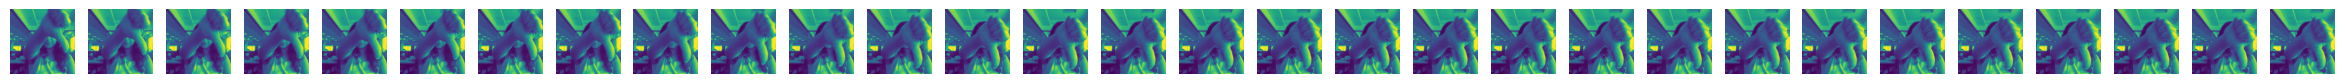

In [ ]:
# Visualize multiple frames from the sequence
frames_to_display = 30  # Number of frames to visualize
test_dataset_root = ''

fig, axes = plt.subplots(1, frames_to_display, figsize=(30, 10))
folder_path_key = test_data_folder[90].split('_000')[0]
for image_folder_name in os.listdir(test_dataset_root):
    if folder_path_key in image_folder_name:
        image_folder_path = os.path.join(test_dataset_root, image_folder_name)

image_names = sorted(os.listdir(image_folder_path))
# Load and display each frame
for i in range(frames_to_display):

    image_path = os.path.join(image_folder_path, image_names[i])
    # print(image_path)
    # Open and transform the image
    image = Image.open(image_path).convert("L")
    image_tensor = transform(image)
    image_np = image_tensor.numpy().transpose(1, 2, 0)

    # Plot image
    axes[i].imshow(image_np)
    axes[i].axis('off')  # Hide axis for clarity
